In [1]:
# bibliotecas
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import seaborn as sns

# arquivos
import data_defs

In [2]:
# Perguntar ao usuário se são dados de desenvolvimento ou produção
data_type = input("Você está trabalhando com dados de desenvolvimento ou produção? (Digite '1' para 'dev' ou '2' para 'prod'): ").strip().lower()

In [3]:
# Verificar o tipo de dados e definir os caminhos correspondentes
if data_type == '1':
    file_name = 'dataset_kobe_dev.parquet'
    output_suffix = 'dev'
elif data_type == '2':
    file_name = 'dataset_kobe_prod.parquet'
    output_suffix = 'prod'
else:
    raise ValueError("Tipo de dados inválido. Por favor, digite 'dev' ou 'prod'.")

In [4]:
# Diretório base do projeto (subindo três níveis a partir do diretório atual)
BASE_DIR = Path(os.getcwd()).parent

# Caminho onde os dados estão armazenados
DATA_PATH = BASE_DIR / 'data' / '01_raw'

In [5]:
# Caminho dos arquivos raw
FILE_PATH = DATA_PATH / file_name

In [6]:
# Ler o arquivo
data = pd.read_parquet(FILE_PATH)

In [7]:
# Verificando os dados antes de selecionar as colunas, para ver se há alguma duplicada, considerando os dados na sua totalidade
data_defs.shape(data, output_suffix)

,dev
,
Float64,3
Int64,11
Linhas Duplicadas,0
Linhas com Nulos,3986
Linhas Únicas,24271
Object,11
Total Colunas,25
Total Linhas,24271


In [8]:
data.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

Explorando DEV_DATA

In [9]:
data_defs.check(data)

,coluna,tipo,únicos,null_soma,media,desvio,minimo,25%,mediana,75%,maximo,moda,frequência_moda
0,action_type,object,56,0,n/a,n/a,n/a,n/a,n/a,n/a,n/a,Jump Shot,12639
1,combined_shot_type,object,6,0,n/a,n/a,n/a,n/a,n/a,n/a,n/a,Jump Shot,17060
2,game_event_id,int64,609,0,240.571464,148.513569,2.0,102.0,244.0,355.0,659.0,2,111
3,game_id,int64,1556,0,24832944.583618,7816365.710487,20000012.0,20400937.0,20900146.0,29601055.0,49900088.0,20200069,39
4,lat,float64,276,0,33.980603,0.065872,33.5433,33.9253,33.9993,34.0443,34.0883,34.0443,5569
5,loc_x,int64,432,0,7.407935,93.601652,-218.0,-44.0,0.0,75.0,220.0,0,5444
6,loc_y,int64,276,0,63.697417,65.871523,-44.0,0.0,45.0,119.0,501.0,0,5569
7,lon,float64,432,0,-118.262392,0.093602,-118.4878,-118.3138,-118.2698,-118.1948,-118.0498,-118.2698,5444
8,minutes_remaining,int64,12,0,5.091591,3.420637,0.0,2.0,5.0,8.0,11.0,0,2508
9,period,int64,7,0,2.47052,1.149706,1.0,1.0,3.0,3.0,7.0,1,6715


In [10]:
# Tratar os dados: ajustar tipos e remover valores ausentes
data = data.assign(
    playoffs=lambda x: x['playoffs'].astype(bool),
    shot_made_flag=lambda x: x['shot_made_flag'].astype(bool)
).dropna(subset=['shot_made_flag'])

In [11]:
data_defs.check(data)

,coluna,tipo,únicos,null_soma,media,desvio,minimo,25%,mediana,75%,maximo,moda,frequência_moda
0,action_type,object,56,0,n/a,n/a,n/a,n/a,n/a,n/a,n/a,Jump Shot,12639
1,combined_shot_type,object,6,0,n/a,n/a,n/a,n/a,n/a,n/a,n/a,Jump Shot,17060
2,game_event_id,int64,609,0,240.571464,148.513569,2.0,102.0,244.0,355.0,659.0,2,111
3,game_id,int64,1556,0,24832944.583618,7816365.710487,20000012.0,20400937.0,20900146.0,29601055.0,49900088.0,20200069,39
4,lat,float64,276,0,33.980603,0.065872,33.5433,33.9253,33.9993,34.0443,34.0883,34.0443,5569
5,loc_x,int64,432,0,7.407935,93.601652,-218.0,-44.0,0.0,75.0,220.0,0,5444
6,loc_y,int64,276,0,63.697417,65.871523,-44.0,0.0,45.0,119.0,501.0,0,5569
7,lon,float64,432,0,-118.262392,0.093602,-118.4878,-118.3138,-118.2698,-118.1948,-118.0498,-118.2698,5444
8,minutes_remaining,int64,12,0,5.091591,3.420637,0.0,2.0,5.0,8.0,11.0,0,2508
9,period,int64,7,0,2.47052,1.149706,1.0,1.0,3.0,3.0,7.0,1,6715


In [12]:
# Verificando os dados após a seleção. A duplicadas aqui não serão excluídas, pois não representam duplicadas 
# verdadeiras, quando considerado os dados em sua totalidade

data_defs.shape(data, output_suffix)

,dev
Total Linhas,24271
Linhas Únicas,24271
Linhas Duplicadas,0
Linhas com Nulos,0
,
Total Colunas,25
Int64,10
Float64,2
Object,11


Dropar as linhas nulas da coluna 'shot_made_flag'

In [13]:
data = data.dropna(subset=['shot_made_flag'])

In [14]:
data_defs.shape(data, output_suffix)

,dev
Total Linhas,24271
Linhas Únicas,24271
Linhas Duplicadas,0
Linhas com Nulos,0
,
Total Colunas,25
Int64,10
Float64,2
Object,11


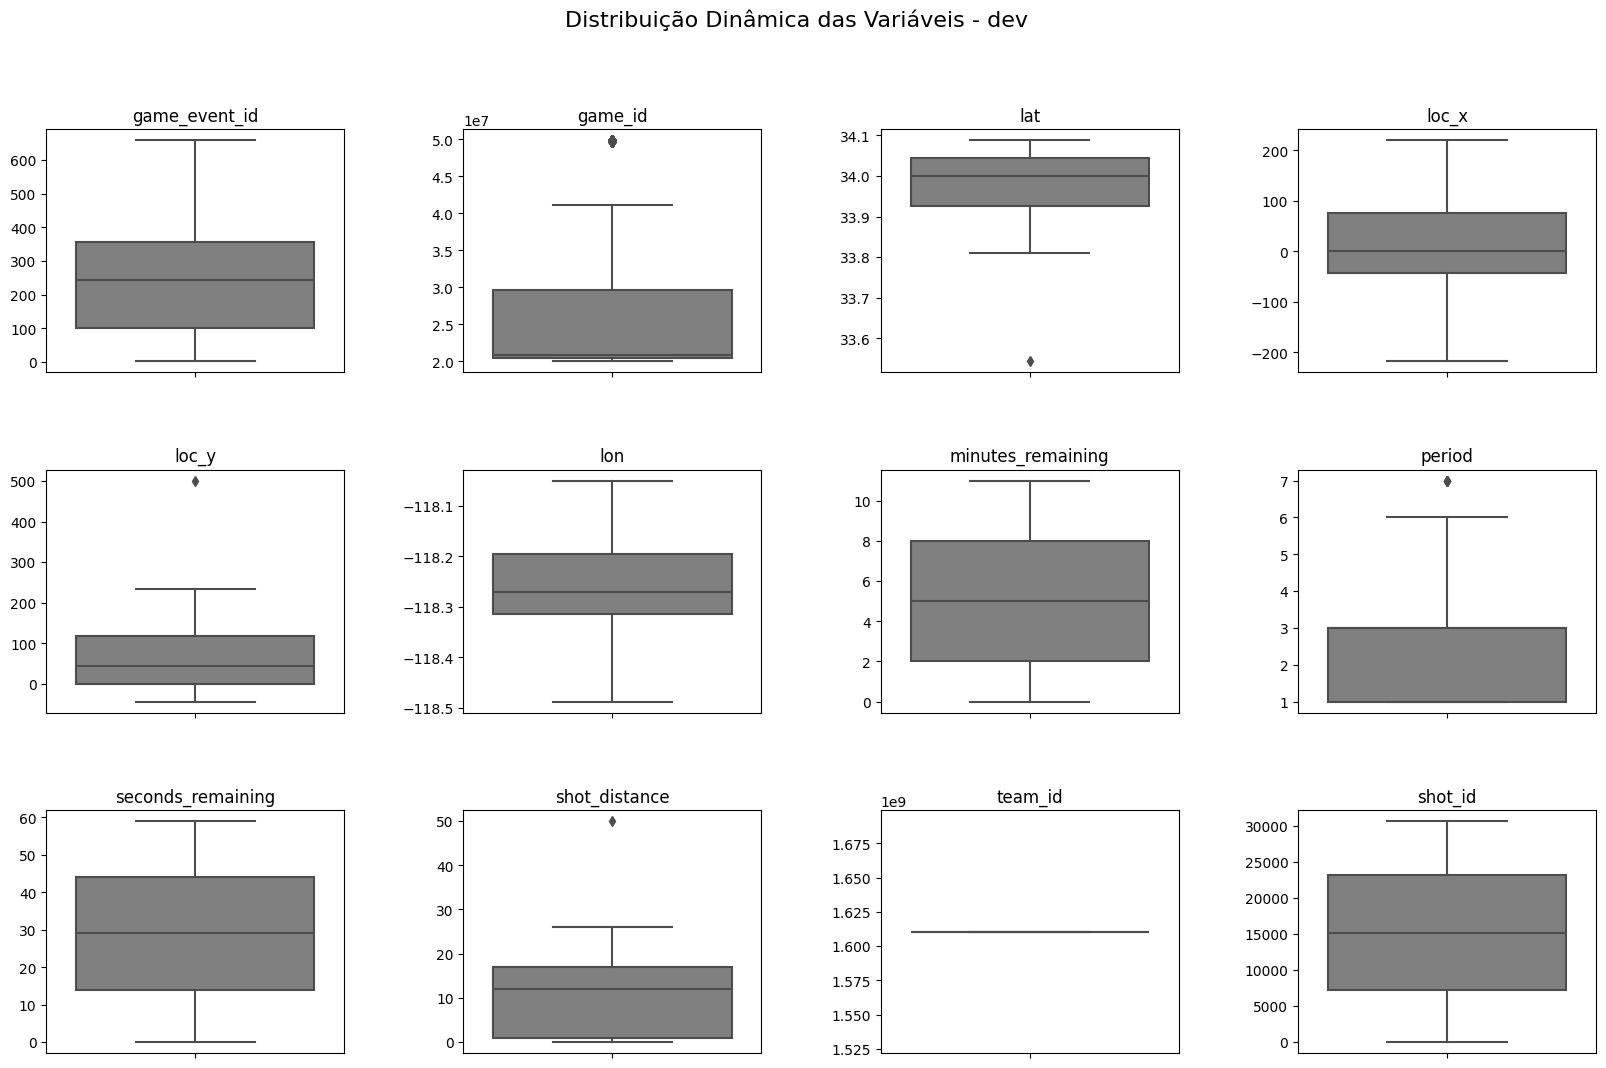

In [15]:
# Gerar os gráficos para os vinhos brancos
data_defs.plot_boxplots(data, output_suffix)

c:\ProgramData\anaconda3\envs\env_ml_eng_25E1_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\env_ml_eng_25E1_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\env_ml_eng_25E1_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\env_ml_eng_25E1_3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

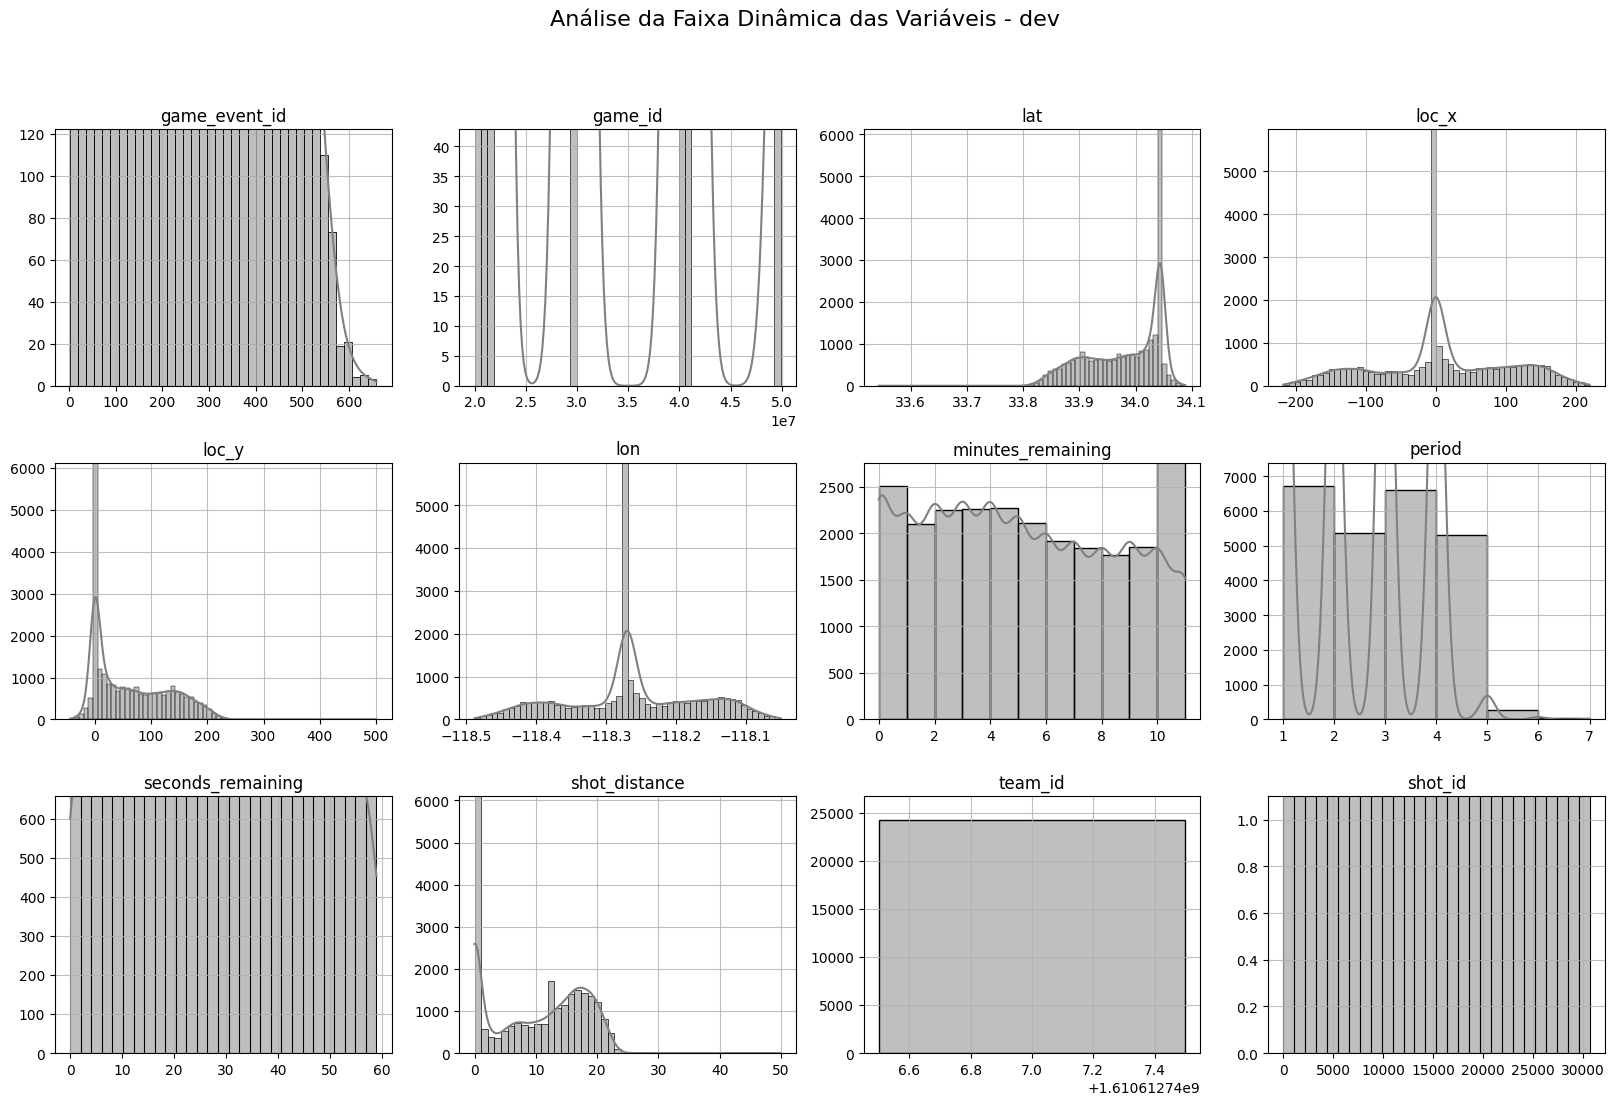

In [16]:
data_defs.plot_histograms(data, output_suffix)

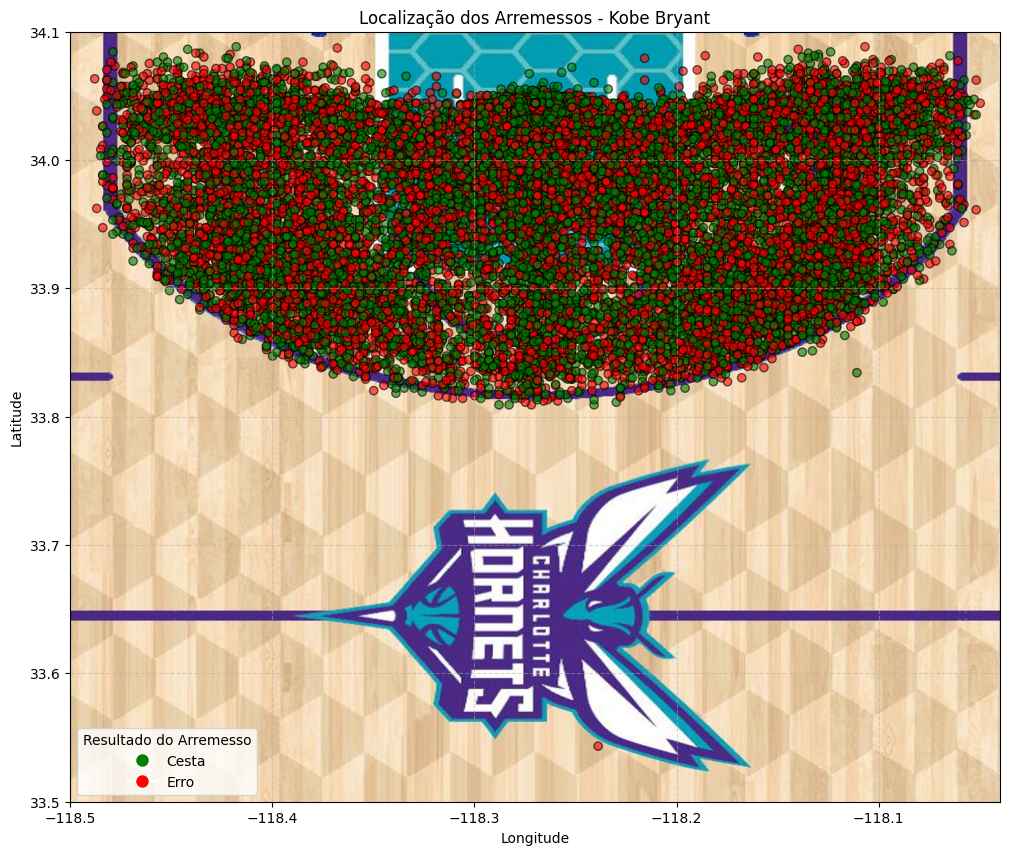

In [17]:
def plot_kobe_shots(data):

    # Remover duplicatas
    data = data.drop_duplicates()

    # Mapear valores para cores
    colors = data['shot_made_flag'].map({True: 'green', False: 'red'})

    # Criar o gráfico de dispersão com tamanho aumentado
    fig, ax = plt.subplots(figsize=(12, 10))  # Aumentado proporcionalmente

    # Carregar a imagem da quadra de basquete
    img = mpimg.imread('assets/basket_court2.png')

    # Definir os limites da quadra em longitude e latitude
    lon_min, lon_max = -118.5, -118.04
    lat_min, lat_max = 33.5, 34.1  # Ajustado conforme solicitado

    # Exibir a imagem de fundo ajustada
    ax.imshow(img, extent=[lon_min, lon_max, lat_min, lat_max], aspect='auto')

    # Plotar os arremessos sobre a imagem
    scatter = ax.scatter(data['lon'], data['lat'], c=colors, alpha=0.6, edgecolors='k')

    # Adicionar legenda manualmente
    legend_labels = {'green': 'Cesta', 'red': 'Erro'}
    handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color)
               for color in legend_labels.keys()]
    
    ax.legend(handles, legend_labels.values(), title="Resultado do Arremesso")

    # Configurar título e eixos
    ax.set_title("Localização dos Arremessos - Kobe Bryant")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(True, linestyle='--', alpha=0.5)

    # Ajustar os limites conforme solicitado
    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)  # Aplicado o novo intervalo de latitude

    # Exibir o gráfico
    plt.show()


# Chamar a função
plot_kobe_shots(data)

In [18]:
# Caminho onde os dados processados serão armazenados
PROCESSED_DATA_PATH = BASE_DIR / 'data' / '02_intermediate'

# Criação do diretório, se ele não existir
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

# Caminho do arquivo processado
PROCESSED_FILE_PATH = PROCESSED_DATA_PATH / f'data_filtered_{output_suffix}.parquet'

# Salvar os dados processados
data.to_parquet(PROCESSED_FILE_PATH, index=False)

print(f"Arquivo processado salvo em: {PROCESSED_FILE_PATH}")

Arquivo processado salvo em: c:\Users\pesso\Documents\DevProjects\GitHubRepositories\ml_models\04_infnet_ml_engineering_pd\04-infnet-ml-engineering-pd\data\02_intermediate\data_filtered_dev.parquet
